In [1]:
import os
import pandas as pd
import shutil

In [2]:
import tensorflow as tf
from tensorflow import keras

2022-12-22 04:13:54.210858: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-22 04:13:54.406057: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-22 04:13:55.143056: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-22 04:13:55.143173: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams

%matplotlib inline

# figure size in inches
rcParams['figure.figsize'] = 20,10

## Data Preparation

In [4]:
train_path = 'dataset/train'
val_path = 'dataset/valid'
test_path = 'dataset/test'

In [5]:
shutil.rmtree(train_path+'/joker')
shutil.rmtree(val_path+'/joker')
shutil.rmtree(test_path+'/joker')

In [6]:
class_suits_dict = {
    'clubs' : '♣',
    'diamonds' : '♦',
    'spades' : '♠',
    'hearts' : '♥'
}

class_rank_dict = {
    'ace' : '1',
    'two' : '2',
    'three' : '3',
    'four' : '4',
    'five' : '5',
    'six' : '6',
    'seven' : '7',
    'eight' : '8',
    'nine' : '9',
    'ten' : '10',
    'jack' : 'J',
    'queen' : 'Q',
    'king' : 'K',
}

In [7]:
class_name = os.listdir(train_path)

In [8]:
class_name = list(map(lambda x: class_rank_dict[x.split()[0]]+class_suits_dict[x.split()[2]], class_name))

# EDA


### Dataset

This dataset consist of various images of cards present in a standart 52-card deck and had already divided data between test, validation, and test datasets.  

A standart 52-card deck comprises 13 ranks in each of the four French suits: 

- clubs (♣)
- diamonds (♦)
- hearts (♥)
- spades (♠) 

Each suit includes ten numeral cards, from 1 to 10.

Also includes three court cards, King (K), Queen (Q) and Jack (J), with reversible images. 

Font: https://en.wikipedia.org/wiki/Standard_52-card_deck

### Examples of images

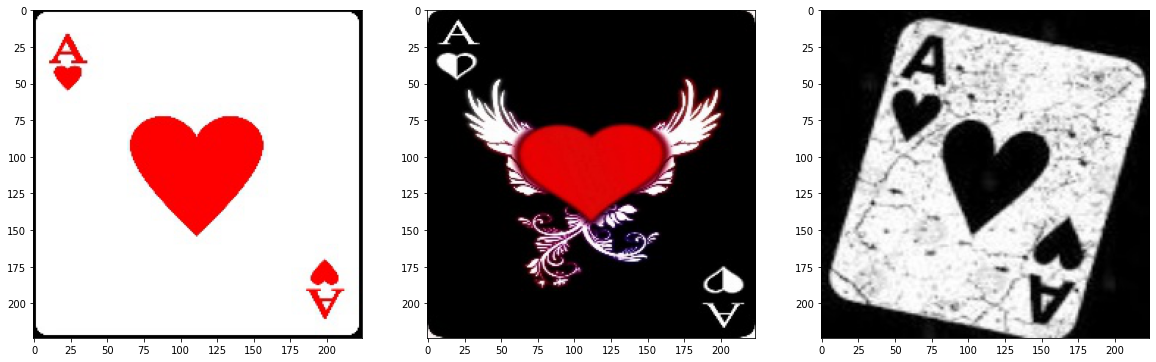

In [9]:
import matplotlib.image as mpimg

# read images
img_A = mpimg.imread('datasets/train/ace of hearts/004.jpg')
img_B = mpimg.imread('datasets/train/ace of hearts/025.jpg')
img_C = mpimg.imread('datasets/train/ace of hearts/122.jpg')
# display images
fig, ax = plt.subplots(1,3)
ax[0].imshow(img_A)
ax[1].imshow(img_B)
ax[2].imshow(img_C)

### Class Imbalance

In [10]:
count_files = []

train_folders = os.listdir(train_path)
for folder in train_folders:
    train_folder = os.path.join(train_path, folder)
    count_files.append(len(os.listdir(train_folder)))

In [11]:
len_df  = pd.DataFrame(zip(class_name,count_files), columns=['class','number'])

In [12]:
len_df = len_df.sort_values('class', ignore_index=True)

In [13]:
len_df = pd.concat([len_df[4:39],len_df[0:4],len_df[40:43],len_df[48:51], len_df[44:47]], ignore_index=True)

<AxesSubplot: xlabel='class', ylabel='number'>

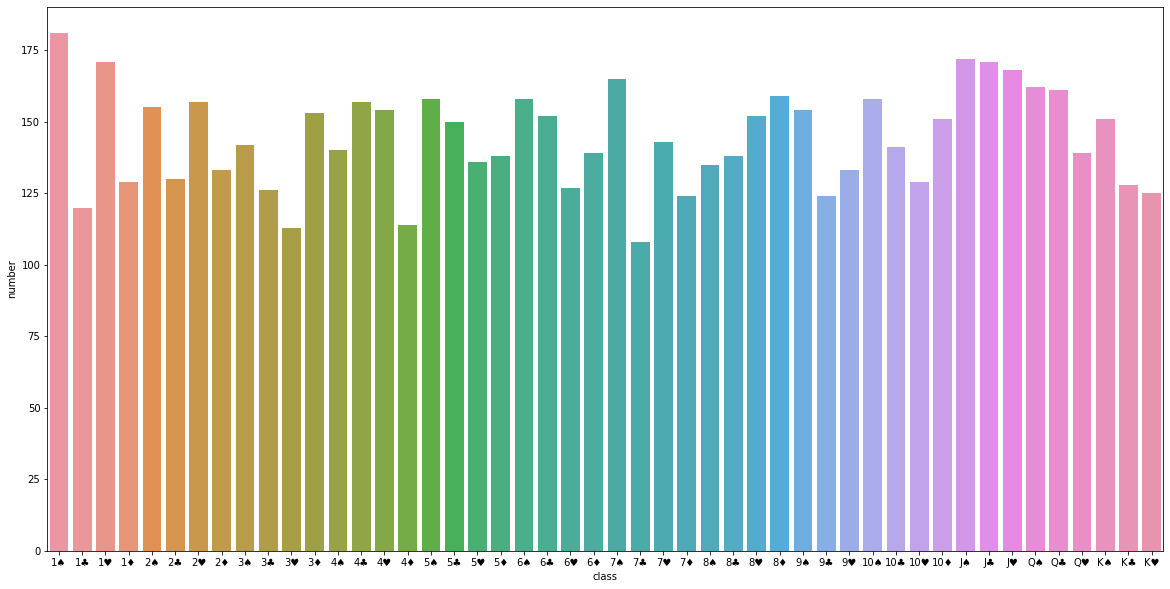

In [14]:
sns.barplot(x = 'class', y = 'number', data = len_df)

## Models

Train and validade the following models:

- Xception
- VGG16
- ResNet50V2
- MobileNetV2

Using imagenet dataset

In [15]:
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
DIM_SIZE = 224
LAYER_NUM = len(class_name)

In [81]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    train_path,
    target_size=(DIM_SIZE, DIM_SIZE),
    batch_size=32
)

Found 7509 images belonging to 52 classes.


In [18]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    val_path,
    target_size=(DIM_SIZE, DIM_SIZE),
    batch_size=32,
    shuffle=False
)

Found 260 images belonging to 52 classes.


### Xception

In [19]:
from tensorflow.keras.applications.xception import Xception

In [20]:
xception_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(DIM_SIZE, DIM_SIZE, 3)
)

2022-12-22 04:14:02.163401: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-22 04:14:02.908258: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7425 MB memory:  -> device: 0, name: Tesla M60, pci bus id: 0001:00:00.0, compute capability: 5.2


### VGG16

In [21]:
from tensorflow.keras.applications.vgg16 import VGG16

In [22]:
vgg16_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(DIM_SIZE, DIM_SIZE, 3)
)

### ResNet50V2

In [23]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [24]:
resnet_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(DIM_SIZE, DIM_SIZE, 3)
)

### MobilenetV2

In [25]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

In [26]:
mobilenet_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(DIM_SIZE, DIM_SIZE, 3)
)

## Training/Validating

In [27]:
import numpy as np
import scipy

In [28]:
EPOCHS = 5

In [29]:
scores = {}

def train_val_model(model_dict):

    for model_name in model_dict:
        
        base_model = model_dict[model_name]
        
        base_model.trainable = False

        inputs = keras.Input(shape=(DIM_SIZE, DIM_SIZE, 3))

        base = base_model(inputs, training=False)

        vectors = keras.layers.GlobalAveragePooling2D()(base)

        outputs = keras.layers.Dense(LAYER_NUM)(vectors)

        model = keras.Model(inputs, outputs)

        learning_rate = 0.01
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

        loss = keras.losses.CategoricalCrossentropy(from_logits=True)

        model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

        history = model.fit(train_ds, epochs=EPOCHS, validation_data=val_ds)
        
        return = history.history
        
    return scores   

In [30]:
model_dict = {'xception_model': xception_model, 'vgg16_model': vgg16_model, 'resnet_model': resnet_model, 'mobilenet_model': mobilenet_model}

In [31]:
scores = train_val_model(model_dict)

Epoch 1/5
235/235 [==============================] - 366s 2s/step - loss: 3.3767 - accuracy: 0.2643 - val_loss: 2.8941 - val_accuracy: 0.3346
Epoch 2/5
235/235 [==============================] - 307s 1s/step - loss: 2.0196 - accuracy: 0.4874 - val_loss: 3.3562 - val_accuracy: 0.3346
Epoch 3/5
235/235 [==============================] - 229s 972ms/step - loss: 1.4276 - accuracy: 0.6007 - val_loss: 2.9325 - val_accuracy: 0.3846
Epoch 4/5
235/235 [==============================] - 216s 916ms/step - loss: 1.1018 - accuracy: 0.6840 - val_loss: 2.9032 - val_accuracy: 0.3962
Epoch 5/5
235/235 [==============================] - 214s 909ms/step - loss: 0.8108 - accuracy: 0.7518 - val_loss: 3.2532 - val_accuracy: 0.4154
Epoch 1/5
235/235 [==============================] - 216s 880ms/step - loss

2022-12-22 04:14:15.372007: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8201
2022-12-22 04:14:15.729804: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


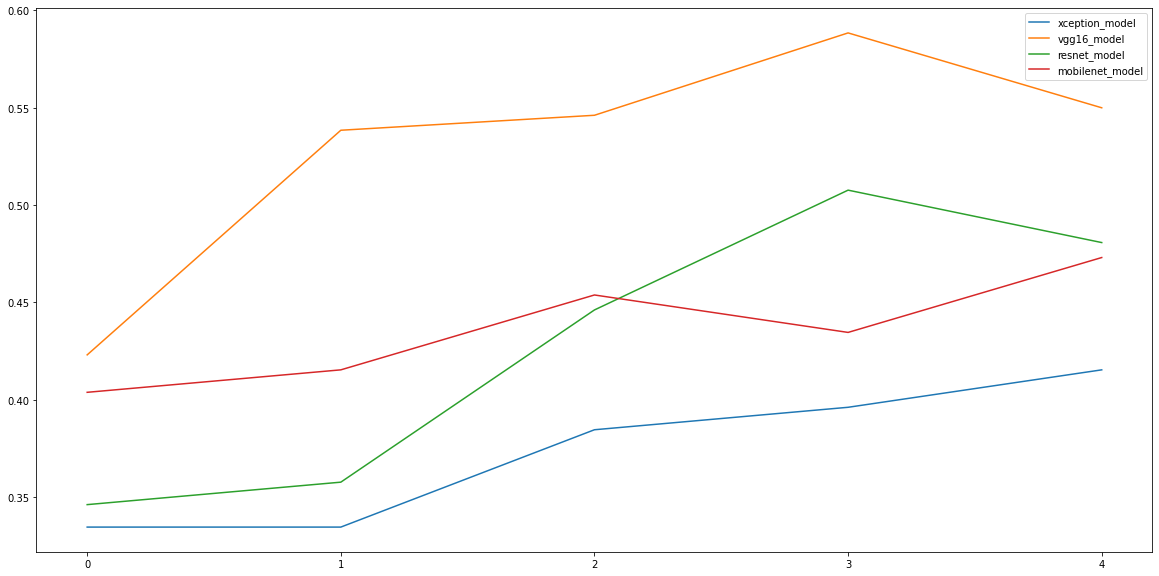

In [32]:
for model, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=(model))

plt.xticks(np.arange(EPOCHS))
plt.legend()

## Parameter Tuning

- Learning Rate
- Inner Size
- Augmentation

In [36]:
def train_val_vgg16(base_model, lr=0.01, inner_size=100):
  
    base_model.trainable = False

    inputs = keras.Input(shape=(DIM_SIZE, DIM_SIZE, 3))

    base = base_model(inputs, training=False)

    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(inner_size, activation='relu')(vectors)

    outputs = keras.layers.Dense(LAYER_NUM)(inner)

    model = keras.Model(inputs, outputs)

    optimizer = keras.optimizers.Adam(learning_rate=lr)

    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    history = model.fit(train_ds, epochs=EPOCHS, validation_data=val_ds)
    
    return history.history   

### Learning Rate

In [34]:
scores = {}
for lr in [0.0001, 0.001, 0.01, 0.1]:
    scores[lr] = train_val_vgg16(vgg16_model, lr)


Epoch 1/5
235/235 [==============================] - 231s 979ms/step - loss: 4.0208 - accuracy: 0.0309 - val_loss: 3.8831 - val_accuracy: 0.0654
Epoch 2/5
235/235 [==============================] - 208s 884ms/step - loss: 3.8387 - accuracy: 0.0700 - val_loss: 3.7588 - val_accuracy: 0.0923
Epoch 3/5
235/235 [==============================] - 222s 943ms/step - loss: 3.7393 - accuracy: 0.1023 - val_loss: 3.6621 - val_accuracy: 0.1231
Epoch 4/5
235/235 [==============================] - 211s 896ms/step - loss: 3.6581 - accuracy: 0.1289 - val_loss: 3.5753 - val_accuracy: 0.1577
Epoch 5/5
235/235 [==============================] - 205s 871ms/step - loss: 3.5852 - accuracy: 0.1547 - val_loss: 3.4959 - val_accuracy: 0.1885
Epoch 1/5
235/235 [==============================] - 206s 872ms/step - loss: 3.6113 -

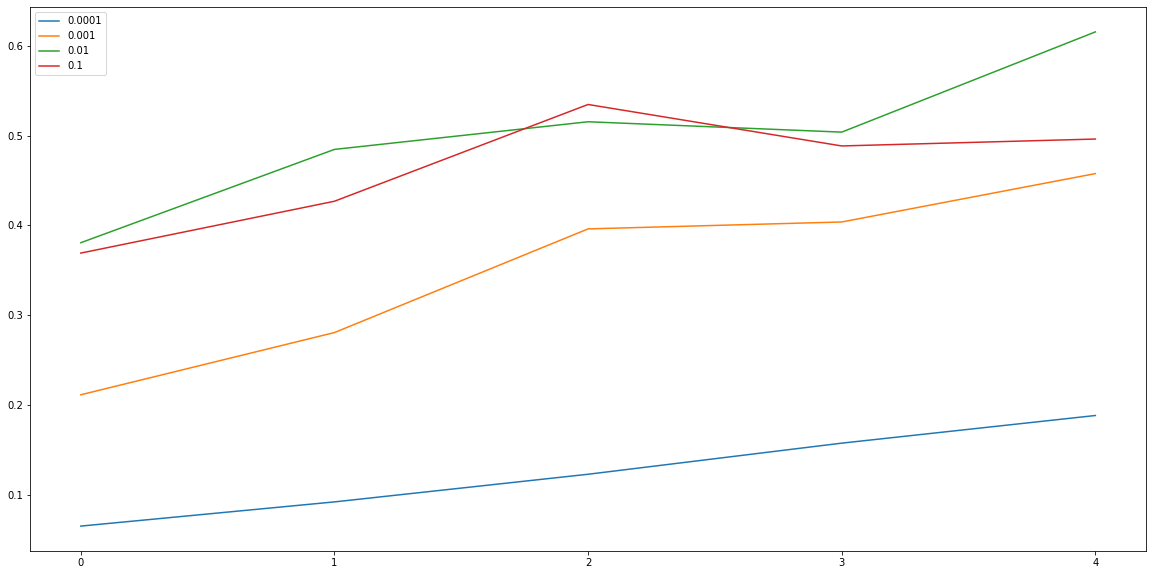

In [35]:
for lr, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=(lr))

plt.xticks(np.arange(EPOCHS))
plt.legend()

### Inner Size

In [44]:
scores = {}

for size in [10, 100, 1000]:
    scores[size] = train_val_vgg16(vgg16_model, inner_size=size)


Epoch 1/5
235/235 [==============================] - 195s 825ms/step - loss: 3.4320 - accuracy: 0.0671 - val_loss: 2.8427 - val_accuracy: 0.1538
Epoch 2/5
235/235 [==============================] - 184s 783ms/step - loss: 2.8699 - accuracy: 0.1404 - val_loss: 2.5622 - val_accuracy: 0.2154
Epoch 3/5
235/235 [==============================] - 196s 833ms/step - loss: 2.6473 - accuracy: 0.1979 - val_loss: 2.3346 - val_accuracy: 0.2308
Epoch 4/5
235/235 [==============================] - 193s 822ms/step - loss: 2.5019 - accuracy: 0.2287 - val_loss: 2.2052 - val_accuracy: 0.2769
Epoch 5/5
235/235 [==============================] - 199s 845ms/step - loss: 2.4107 - accuracy: 0.2532 - val_loss: 2.1173 - val_accuracy: 0.2923
Epoch 1/5
235/235 [==============================] - 197s 831ms/step - loss: 2.8837 -

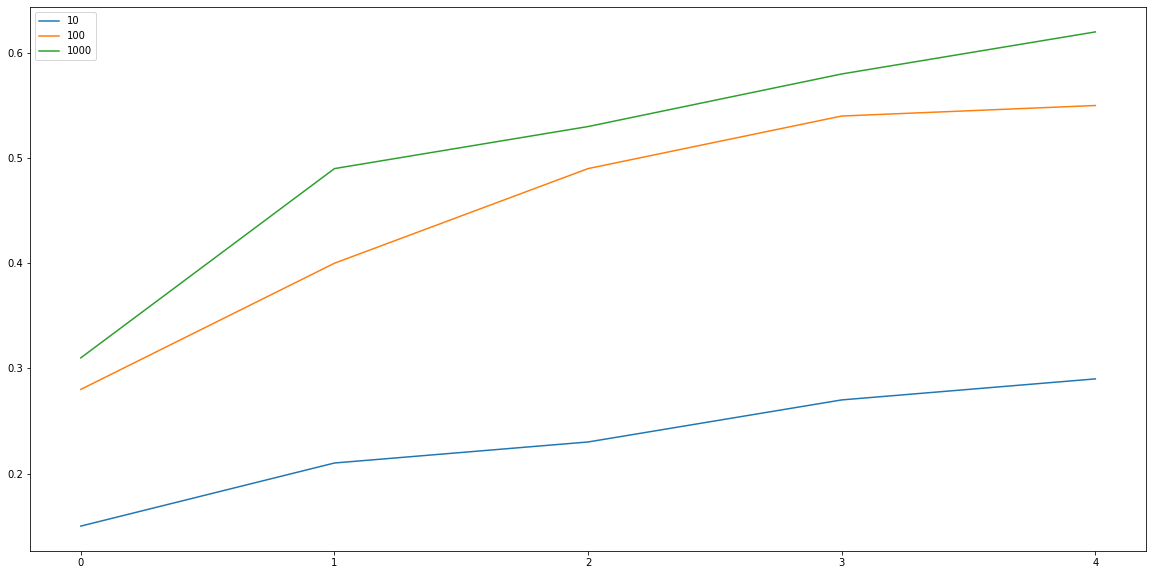

In [73]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=(size))

plt.xticks(np.arange(EPOCHS))
plt.legend()

# Augmentation

In [74]:
# Create image generator for train data and also augment the images
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input,
                               rotation_range=30,
                               shear_range=10,
                               zoom_range=0.1)

train_ds = train_gen.flow_from_directory(train_path,
                                         target_size=(DIM_SIZE,DIM_SIZE),
                                         batch_size=32)

Found 7509 images belonging to 52 classes.


In [75]:
scores = []
scores = train_val_vgg16(vgg16_model)

Epoch 1/5
235/235 [==============================] - 300s 1s/step - loss: 2.9128 - accuracy: 0.1629 - val_loss: 2.1104 - val_accuracy: 0.2846
Epoch 2/5
235/235 [==============================] - 283s 1s/step - loss: 2.2472 - accuracy: 0.2972 - val_loss: 1.7996 - val_accuracy: 0.3769
Epoch 3/5
235/235 [==============================] - 269s 1s/step - loss: 2.0799 - accuracy: 0.3518 - val_loss: 1.6211 - val_accuracy: 0.4423
Epoch 4/5
235/235 [==============================] - 268s 1s/step - loss: 1.9526 - accuracy: 0.3805 - val_loss: 1.6381 - val_accuracy: 0.4538
Epoch 5/5
235/235 [==============================] - 268s 1s/step - loss: 1.8676 - accuracy: 0.4230 - val_loss: 1.5705 - val_accuracy: 0.4500


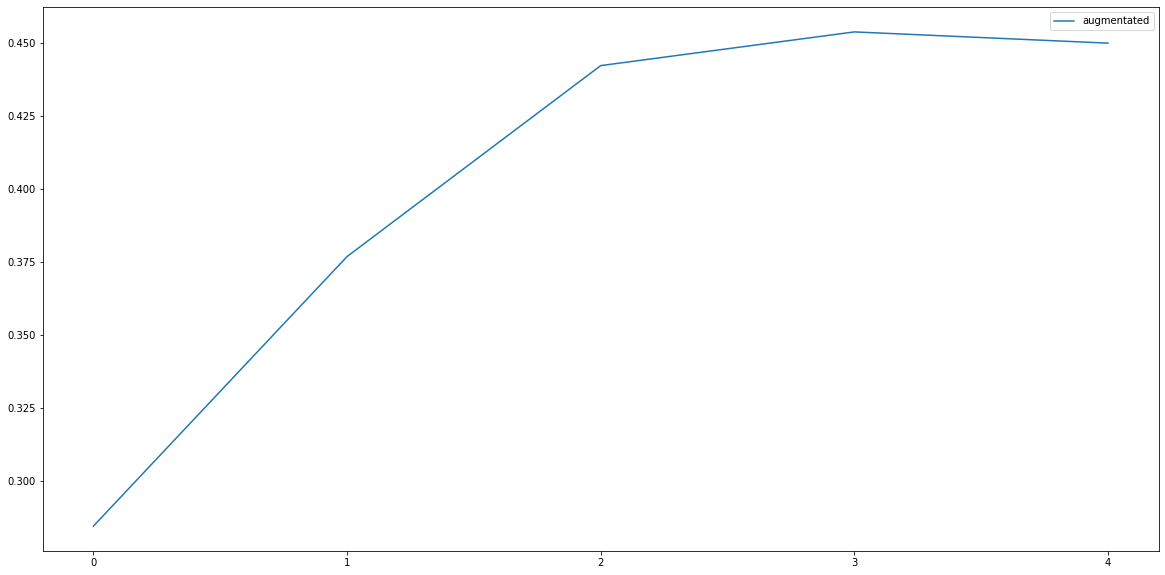

In [80]:
plt.plot(scores, label=('augmentated'))

plt.xticks(np.arange(EPOCHS))
plt.legend()

### Saving Best Model

In [82]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'vgg16_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [83]:
def train_vgg16(base_model, lr=0.01, inner_size=1000):
  
    base_model.trainable = False

    inputs = keras.Input(shape=(DIM_SIZE, DIM_SIZE, 3))

    base = base_model(inputs, training=False)

    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(inner_size, activation='relu')(vectors)

    outputs = keras.layers.Dense(LAYER_NUM)(inner)

    model = keras.Model(inputs, outputs)

    optimizer = keras.optimizers.Adam(learning_rate=lr)

    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model 

In [84]:
EPOCHS = 10

In [85]:
model = train_vgg16(vgg16_model)

history = model.fit(
    train_ds,
    epochs=EPOCHS,
    validation_data=val_ds,
    callbacks=[chechpoint]
)

Epoch 1/10
235/235 [==============================] - 221s 935ms/step - loss: 2.7499 - accuracy: 0.2189 - val_loss: 1.8740 - val_accuracy: 0.3654
Epoch 2/10
235/235 [==============================] - 205s 870ms/step - loss: 1.9406 - accuracy: 0.4040 - val_loss: 1.5138 - val_accuracy: 0.4923
Epoch 3/10
235/235 [==============================] - 207s 881ms/step - loss: 1.6608 - accuracy: 0.4937 - val_loss: 1.2293 - val_accuracy: 0.6038
Epoch 4/10
235/235 [==============================] - 206s 874ms/step - loss: 1.4611 - accuracy: 0.5561 - val_loss: 1.2285 - val_accuracy: 0.6154
Epoch 5/10
235/235 [==============================] - 208s 885ms/step - loss: 1.3380 - accuracy: 0.5914 - val_loss: 1.1852 - val_accuracy: 0.5923
Epoch 6/10
235/235 [==============================] - 224s 950ms/step - 